In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread, imsave

from pdf2image import convert_from_path, convert_from_bytes

In [5]:
images = convert_from_path('modelo.pdf')
for image in images:
    image.save('modelo.png', 'PNG')

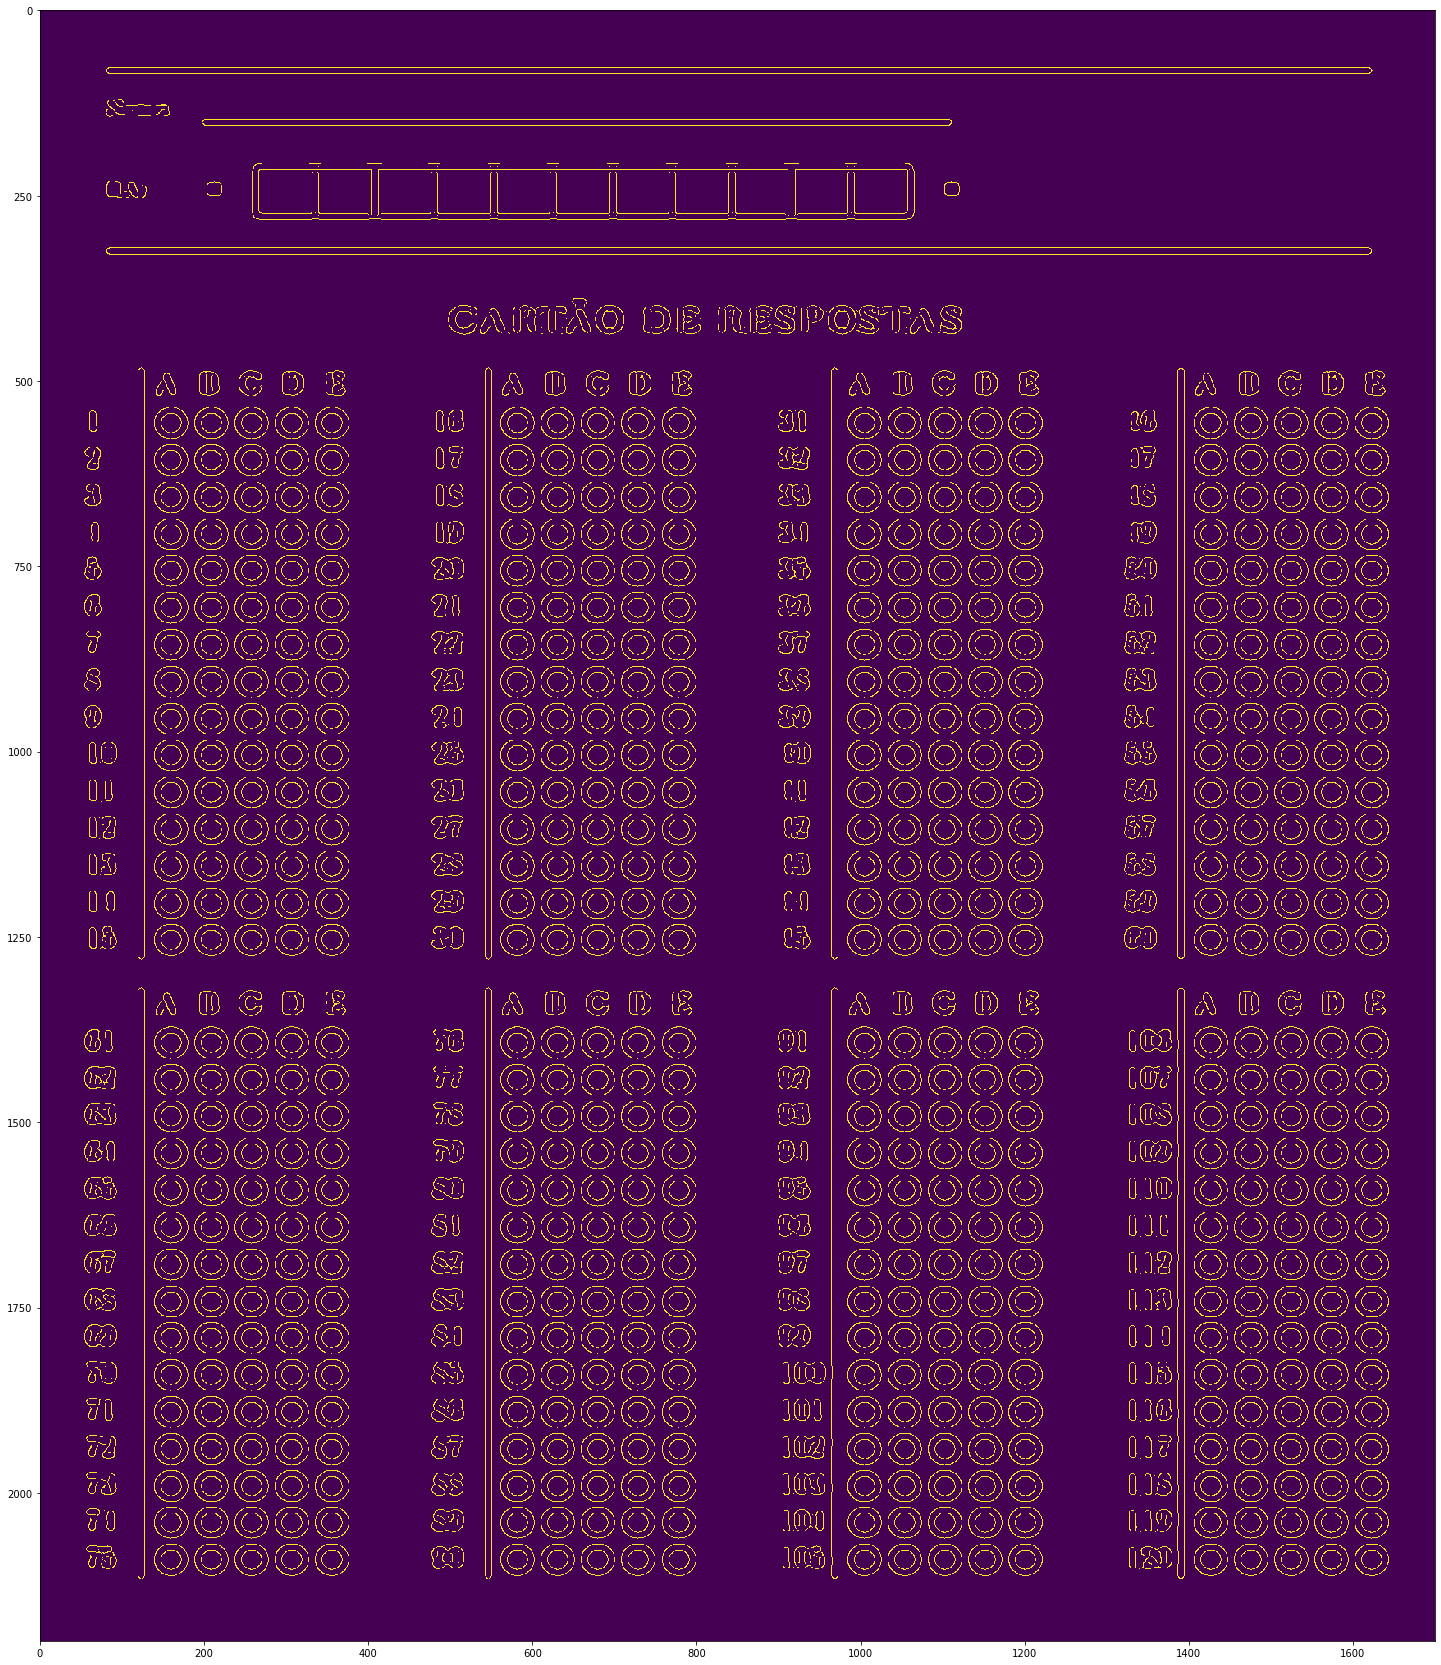

In [11]:
# Load picture and detect edges
image = imread('modelo.png', as_gray=True)
image = img_as_ubyte(image)
edges = canny(image, sigma=4, low_threshold=10, high_threshold=10)

plt.figure(figsize=(25,30))
plt.imshow(edges, aspect='auto')
plt.savefig('edges.png')

In [8]:
# Detect two radii
hough_radii = np.arange(20, 25, 2)
hough_res = hough_circle(edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=200)

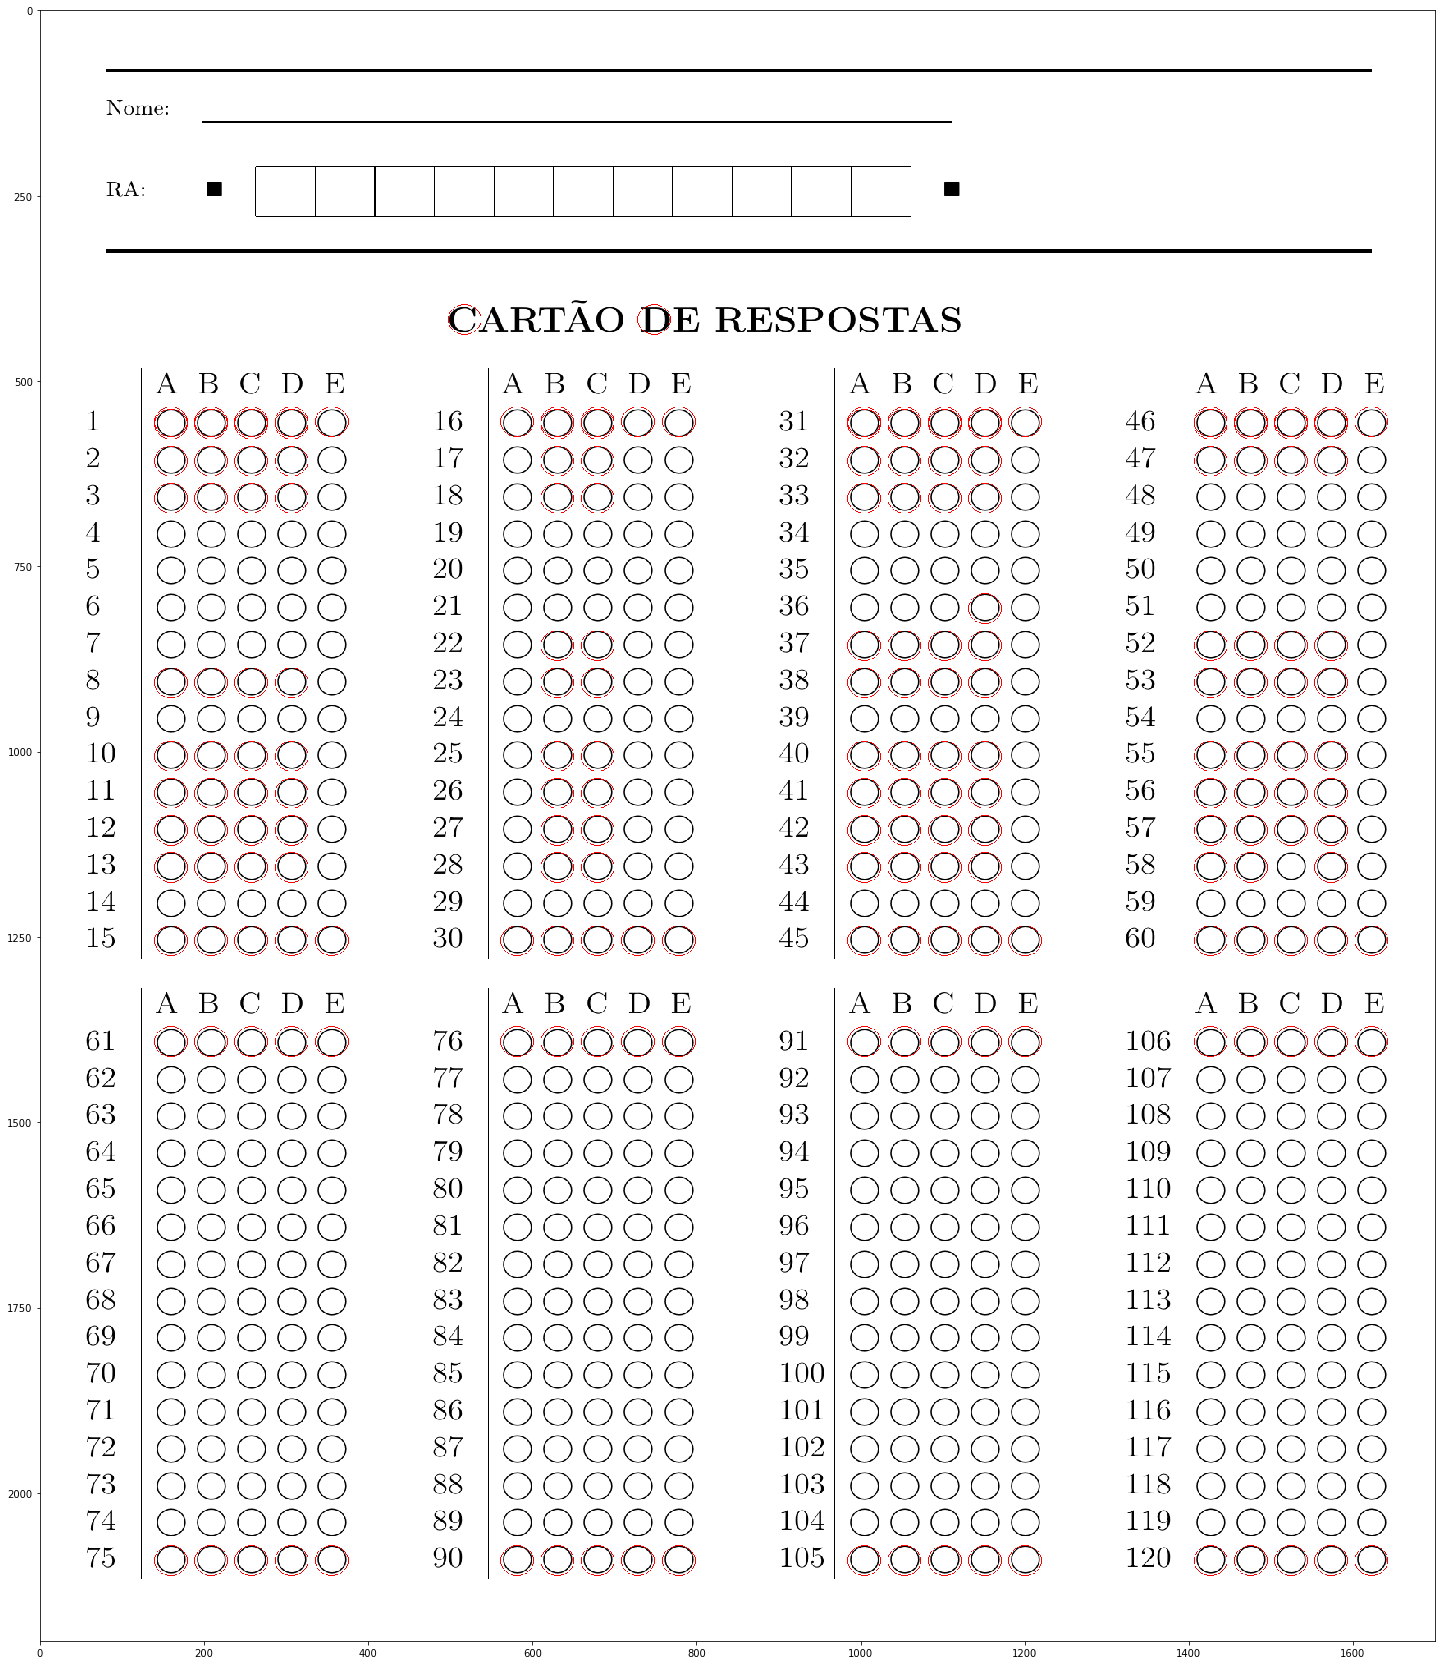

In [12]:
# Draw them

image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (255, 0, 0)

plt.figure(figsize=(25,30))
plt.imshow(image, aspect='auto')
imsave('out.png', image)